In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [52]:
sales_df = pd.read_excel('data/train_sales.xlsx')
promo_df = pd.read_excel('data/train_promo.xlsx')
geography_df = pd.read_excel('data/Атрибуты Customer.xlsx')
weights_df = pd.read_excel('data/Веса DFU.xlsx')

In [53]:
sales_df['DFU'].unique()

array(['Рис басмати 500 гр', 'Рис длиннозерный 500 гр',
       'Рис круглозерный 1000 гр', 'Рис круглозерный 500 гр',
       'Рис Жасмин 500 гр', 'Рис для плова 500 гр',
       'Рис длиннозерный 486 гр', 'Гречка Ядрица 1000 гр',
       'Йогурт Постный 180 гр', 'Булгур 300 гр'], dtype=object)

In [54]:
promo_df['DFU'].unique()

array(['Рис длиннозерный 500 гр', 'Рис Жасмин 500 гр',
       'Рис басмати 500 гр', 'Рис для плова 500 гр',
       'Рис круглозерный 1000 гр', 'Йогурт Постный 180 гр',
       'Рис круглозерный 500 гр', 'Булгур 300 гр',
       'Рис длиннозерный 486 гр', 'Киноа 300 гр'], dtype=object)

In [55]:
sales_df[sales_df['DFU'] == 'Рис басмати 500 гр']['Customer'].unique()

array([18, 34,  2, 29, 14,  1])

In [56]:
promo_df[promo_df['DFU'] == 'Рис басмати 500 гр']['Customer'].unique()

array([41,  6,  3, 13, 26, 15,  1, 40,  7, 45, 21, 12, 32, 24, 35, 36, 22,
       27,  8, 20, 23,  4, 43, 10, 19,  5, 30, 44])

In [57]:
for dfu_sales in sales_df['DFU'].unique():
    print(f"Кастомеры по продукту {dfu_sales}")
    print(f"train_sales: {sales_df[sales_df['DFU'] == dfu_sales]['Customer'].unique()}")
    print(f"train_promo: {promo_df[promo_df['DFU'] == dfu_sales]['Customer'].unique()}")
    print('\n')

Кастомеры по продукту Рис басмати 500 гр
train_sales: [18 34  2 29 14  1]
train_promo: [41  6  3 13 26 15  1 40  7 45 21 12 32 24 35 36 22 27  8 20 23  4 43 10
 19  5 30 44]


Кастомеры по продукту Рис длиннозерный 500 гр
train_sales: [1]
train_promo: [41 13  1 15 40 45 21 32 12  3  8 26 22 35 27  7 24  6 36 23 20  4 43  5
 19 10 44]


Кастомеры по продукту Рис круглозерный 1000 гр
train_sales: [1]
train_promo: [15 40  1]


Кастомеры по продукту Рис круглозерный 500 гр
train_sales: [1]
train_promo: [41 26 24 32 27 22  6 45 21  3 15 40 13 35  1 12  8 36  7 20 23  4 43 10
  5 19 44 30]


Кастомеры по продукту Рис Жасмин 500 гр
train_sales: [1]
train_promo: [41  6 13 26 15  1 45 21 36  3 40  7 12 22 35 32 24 27  8 20 23  4 43 10
 19  5 30 44]


Кастомеры по продукту Рис для плова 500 гр
train_sales: [1]
train_promo: [41  3 13 12 27 40 32  1 26 35 45 21 22  6 15  7  8 36 20 23  4 43  5 19
 10 30]


Кастомеры по продукту Рис длиннозерный 486 гр
train_sales: [1]
train_promo: [23 15 32 40 20 

In [58]:
sales_df.head(10)

,DFU,Customer,Period,BPV,Total Sell-in
0,Рис басмати 500 гр,18,2017-07-24,0.846000,0.846000
1,Рис басмати 500 гр,18,2017-10-23,1.692000,1.692000
2,Рис басмати 500 гр,18,2018-02-19,2.538000,2.538000
3,Рис басмати 500 гр,18,2018-04-23,1.692000,1.692000
4,Рис басмати 500 гр,18,2019-04-29,4.232100,4.232100
5,Рис басмати 500 гр,18,2019-08-26,2.257200,2.257200
6,Рис басмати 500 гр,18,2019-11-18,2.257200,2.257200
7,Рис басмати 500 гр,18,2020-02-24,2.257200,2.257200
8,Рис басмати 500 гр,18,2020-05-18,2.257200,2.257200
9,Рис басмати 500 гр,18,2020-06-08,2.254407,2.254407


In [59]:
promo_df.head(10)

,Promo,Promo №,Customer,DFU,Promo mechanic,Start Date on shelf,Promo Days on shelf,End Date on shelf,Shipment days to promo start,First Date of shipment,End Date of shipment,"Discount, %",Units SoD
0,987359,709635,41,Рис длиннозерный 500 гр,395048,2017-12-01,14.0,2017-12-14,14,2017-11-17,2018-01-18,0.15,6216.00000
1,987365,710042,13,Рис длиннозерный 500 гр,395054,2017-12-06,7.0,2017-12-12,21,2017-11-15,2017-12-17,0.20,13511.09062
2,987375,708618,1,Рис длиннозерный 500 гр,395054,2017-12-18,7.0,2017-12-24,21,2017-12-02,2017-12-24,0.25,362049.09560
3,987384,709929,15,Рис длиннозерный 500 гр,395054,2017-12-27,7.0,2018-01-02,22,2017-12-11,2018-01-31,0.25,35816.99982
4,987390,709891,40,Рис длиннозерный 500 гр,395054,2018-01-11,14.0,2018-01-24,21,2017-12-26,2018-03-01,0.25,20898.64467
5,987395,708686,45,Рис длиннозерный 500 гр,395054,2018-01-15,14.0,2018-01-28,14,2018-01-01,2018-03-05,0.25,18636.00000
6,987396,708686,21,Рис длиннозерный 500 гр,395054,2018-01-15,14.0,2018-01-28,14,2018-01-01,2018-03-05,0.25,18636.00000
7,987397,708686,21,Рис длиннозерный 500 гр,395054,2018-01-15,14.0,2018-01-28,14,2018-01-01,2018-03-05,0.25,18636.00000
8,987401,709872,32,Рис длиннозерный 500 гр,395054,2018-01-17,7.0,2018-01-23,27,2018-01-01,2018-01-25,0.25,289615.92480
9,987406,709324,12,Рис длиннозерный 500 гр,395052,2018-01-22,21.0,2018-02-11,7,2018-01-08,2018-03-19,0.20,14400.00000


Начнем с обработки выбросов (выбросом считаем, если значение больше 2 сигм - из встречи с зак)

In [60]:
bpv_mean = sales_df["BPV"].mean()
bpv_std = sales_df["BPV"].std()
lower_bound = bpv_mean - 2 * bpv_std
upper_bound = bpv_mean + 2 * bpv_std

bpv_outliers = sales_df[(sales_df["BPV"] < lower_bound) | (sales_df["BPV"] > upper_bound)]

print(f"Outliers in BPV: {len(bpv_outliers)}")
bpv_outliers

Outliers in BPV: 54


,DFU,Customer,Period,BPV,Total Sell-in
773,Рис длиннозерный 500 гр,1,2017-05-22,161.151000,161.151000
776,Рис длиннозерный 500 гр,1,2017-06-12,117.777000,117.777000
782,Рис длиннозерный 500 гр,1,2017-07-24,199.887000,199.887000
784,Рис длиннозерный 500 гр,1,2017-08-07,604.584000,604.584000
791,Рис длиннозерный 500 гр,1,2017-09-25,351.762000,351.762000
800,Рис длиннозерный 500 гр,1,2017-11-27,89.382000,89.382000
801,Рис длиннозерный 500 гр,1,2017-12-04,272.910000,272.910000
807,Рис длиннозерный 500 гр,1,2018-01-15,304.746000,304.746000
812,Рис длиннозерный 500 гр,1,2018-02-19,93.024000,93.024000
813,Рис длиннозерный 500 гр,1,2018-02-26,179.394000,179.394000


Всего 31 выброс, это 1.5% от всех данных, можно удалить

In [61]:
sales_df_cleaned = sales_df[(sales_df["BPV"] >= lower_bound) & (sales_df["BPV"] <= upper_bound)]
sales_df_cleaned = sales_df_cleaned[sales_df_cleaned["BPV"]>= 0]
print(f"Rows after cleaning: {len(sales_df_cleaned)}")

Rows after cleaning: 2062


Посмотрим на выбросы в promo days on shelf

In [62]:
promo_days_mean = promo_df["Promo Days on shelf"].mean()
promo_days_std = promo_df["Promo Days on shelf"].std()
lower_promo_bound = promo_days_mean - 2 * promo_days_std
upper_promo_bound = promo_days_mean + 2 * promo_days_std

promo_days_outliers = promo_df[(promo_df["Promo Days on shelf"] < lower_promo_bound) |
                               (promo_df["Promo Days on shelf"] > upper_promo_bound)]

print(f"Outliers Promo Days on shelf: {len(promo_days_outliers)}")
promo_days_outliers

Outliers Promo Days on shelf: 62


,Promo,Promo №,Customer,DFU,Promo mechanic,Start Date on shelf,Promo Days on shelf,End Date on shelf,Shipment days to promo start,First Date of shipment,End Date of shipment,"Discount, %",Units SoD
209,988648,709948,1,Рис длиннозерный 500 гр,395054,2019-11-28,37.0,2020-01-03,21,2019-11-12,2020-03-01,0.23,1120000.0
249,988902,709921,3,Рис длиннозерный 500 гр,395048,2020-01-27,40.0,2020-03-06,14,2020-01-01,2020-02-07,0.28,11028.0
283,989110,709594,41,Рис длиннозерный 500 гр,395054,2020-04-01,60.0,2020-05-30,14,2020-03-18,2020-05-05,0.20,24840.0
308,989298,709948,1,Рис длиннозерный 500 гр,395054,2020-11-26,42.0,2021-01-06,16,2020-11-10,2021-01-06,0.20,895656.0
370,989593,709005,3,Рис длиннозерный 500 гр,395048,2020-07-01,57.0,2020-08-26,14,2020-06-18,2020-07-28,0.17,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,987927,709387,15,Булгур 300 гр,395054,2018-12-07,42.0,2019-01-17,16,2018-11-21,2019-02-02,0.30,11000.0
2748,988392,708616,20,Булгур 300 гр,395048,2019-08-15,38.0,2019-09-21,22,2019-07-20,2019-11-20,0.25,2052.0
2770,988572,709881,15,Булгур 300 гр,395054,2019-10-31,36.0,2019-12-05,22,2019-10-15,2020-01-31,0.25,15000.0
2841,989262,709904,40,Булгур 300 гр,395054,2020-11-30,44.0,2021-01-12,16,2020-11-14,2020-12-29,0.25,108.0


2% от общих, тоже дропнем

In [63]:
promo_df_cleaned = promo_df[(promo_df["Promo Days on shelf"] >= lower_promo_bound) &
                            (promo_df["Promo Days on shelf"] <= upper_promo_bound)]
promo_df_cleaned.drop(columns=["Promo №"], inplace=True)
print(f"Rows after cleaning: {len(promo_df_cleaned)}")

Rows after cleaning: 2953


/var/folders/lm/kymf9kqj2kbfvq9cx_8cpz5h0000gn/T/ipykernel_92720/1040314168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promo_df_cleaned.drop(columns=["Promo №"], inplace=True)


Теперь обработаем пропущенные значения в promo_df

In [64]:
missing_promo_days = promo_df_cleaned[promo_df_cleaned["Promo Days on shelf"].isna()]

missing_promo_days

,Promo,Customer,DFU,Promo mechanic,Start Date on shelf,Promo Days on shelf,End Date on shelf,Shipment days to promo start,First Date of shipment,End Date of shipment,"Discount, %",Units SoD


а таких у нас нет

Оставим даты не раньше 2017 года

In [65]:
promo_df_cleaned = promo_df_cleaned[promo_df_cleaned["Start Date on shelf"] >= np.datetime64("2017-01-01")]

Переведем Units SoD в тонны

In [66]:
promo_df_cleaned = pd.merge(promo_df_cleaned, weights_df, on="DFU", how="left")
promo_df_cleaned["SoD"] = promo_df_cleaned["Units SoD"] * promo_df_cleaned["Unit weight, tn"]
promo_df_cleaned.drop(columns=["Unit weight, tn"], inplace=True)
promo_df_cleaned

,Promo,Customer,DFU,Promo mechanic,Start Date on shelf,Promo Days on shelf,End Date on shelf,Shipment days to promo start,First Date of shipment,End Date of shipment,"Discount, %",Units SoD,SoD
0,987359,41,Рис длиннозерный 500 гр,395048,2017-12-01,14.0,2017-12-14,14,2017-11-17,2018-01-18,0.15,6216.00000,7.459200
1,987365,13,Рис длиннозерный 500 гр,395054,2017-12-06,7.0,2017-12-12,21,2017-11-15,2017-12-17,0.20,13511.09062,16.213309
2,987375,1,Рис длиннозерный 500 гр,395054,2017-12-18,7.0,2017-12-24,21,2017-12-02,2017-12-24,0.25,362049.09560,434.458915
3,987384,15,Рис длиннозерный 500 гр,395054,2017-12-27,7.0,2018-01-02,22,2017-12-11,2018-01-31,0.25,35816.99982,42.980400
4,987390,40,Рис длиннозерный 500 гр,395054,2018-01-11,14.0,2018-01-24,21,2017-12-26,2018-03-01,0.25,20898.64467,25.078374
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,990735,22,Киноа 300 гр,395054,2021-05-24,7.0,2021-05-30,14,2021-05-10,2021-05-31,0.25,555.00000,0.333000
2947,990794,45,Киноа 300 гр,395054,2021-06-08,14.0,2021-06-21,14,2021-05-25,2021-06-29,0.25,886.00000,0.531600
2948,990804,43,Киноа 300 гр,395054,2021-06-07,14.0,2021-06-20,14,2021-05-24,2021-06-14,0.25,1000.00000,0.600000
2949,990843,4,Киноа 300 гр,395048,2021-06-15,7.0,2021-06-21,7,2021-06-01,2021-06-13,0.27,14775.00000,8.865000


Добавим сезонность в sales

In [67]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

sales_df_cleaned["Season"] = sales_df_cleaned["Period"].apply(get_season)

Объединим с географией и типом Клиента

In [68]:
sales_df_cleaned = pd.merge(sales_df_cleaned, geography_df, left_on="Customer", right_on="Клиент", how="left")
sales_df_cleaned.rename(columns={"Тип": "Type", "География": "Geography"}, inplace=True)

In [69]:
sales_df_cleaned.drop(columns=["Клиент"], inplace=True)
sales_df_cleaned

,DFU,Customer,Period,BPV,Total Sell-in,Season,Type,Geography
0,Рис басмати 500 гр,18,2017-07-24,0.846000,0.846000,Summer,Дистрибутор,СНГ
1,Рис басмати 500 гр,18,2017-10-23,1.692000,1.692000,Autumn,Дистрибутор,СНГ
2,Рис басмати 500 гр,18,2018-02-19,2.538000,2.538000,Winter,Дистрибутор,СНГ
3,Рис басмати 500 гр,18,2018-04-23,1.692000,1.692000,Spring,Дистрибутор,СНГ
4,Рис басмати 500 гр,18,2019-04-29,4.232100,4.232100,Spring,Дистрибутор,СНГ
...,...,...,...,...,...,...,...,...
2057,Булгур 300 гр,1,2020-02-24,0.000000,0.032400,Winter,Сеть,Москва
2058,Булгур 300 гр,1,2020-03-02,0.000000,3.211500,Spring,Сеть,Москва
2059,Булгур 300 гр,1,2020-04-06,0.000000,0.421200,Spring,Сеть,Москва
2060,Булгур 300 гр,1,2020-07-06,0.008085,0.008085,Summer,Сеть,Москва


Теперь го объединим

In [70]:
promo_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951 entries, 0 to 2950
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Promo                         2951 non-null   int64         
 1   Customer                      2951 non-null   int64         
 2   DFU                           2951 non-null   object        
 3   Promo mechanic                2951 non-null   int64         
 4   Start Date on shelf           2951 non-null   datetime64[ns]
 5   Promo Days on shelf           2951 non-null   float64       
 6   End Date on shelf             2951 non-null   datetime64[ns]
 7   Shipment days to promo start  2951 non-null   int64         
 8   First Date of shipment        2951 non-null   datetime64[ns]
 9   End Date of shipment          2951 non-null   datetime64[ns]
 10  Discount, %                   2951 non-null   float64       
 11  Units SoD                     

In [71]:
sales_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DFU            2062 non-null   object        
 1   Customer       2062 non-null   int64         
 2   Period         2062 non-null   datetime64[ns]
 3   BPV            2062 non-null   float64       
 4   Total Sell-in  2062 non-null   float64       
 5   Season         2062 non-null   object        
 6   Type           2062 non-null   object        
 7   Geography      2062 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 129.0+ KB


создадим неделю для объединения

In [72]:
sales_df_cleaned['End of Period'] = sales_df_cleaned['Period'] + pd.Timedelta(days=6)

In [73]:
sales_df_cleaned

,DFU,Customer,Period,BPV,Total Sell-in,Season,Type,Geography,End of Period
0,Рис басмати 500 гр,18,2017-07-24,0.846000,0.846000,Summer,Дистрибутор,СНГ,2017-07-30
1,Рис басмати 500 гр,18,2017-10-23,1.692000,1.692000,Autumn,Дистрибутор,СНГ,2017-10-29
2,Рис басмати 500 гр,18,2018-02-19,2.538000,2.538000,Winter,Дистрибутор,СНГ,2018-02-25
3,Рис басмати 500 гр,18,2018-04-23,1.692000,1.692000,Spring,Дистрибутор,СНГ,2018-04-29
4,Рис басмати 500 гр,18,2019-04-29,4.232100,4.232100,Spring,Дистрибутор,СНГ,2019-05-05
...,...,...,...,...,...,...,...,...,...
2057,Булгур 300 гр,1,2020-02-24,0.000000,0.032400,Winter,Сеть,Москва,2020-03-01
2058,Булгур 300 гр,1,2020-03-02,0.000000,3.211500,Spring,Сеть,Москва,2020-03-08
2059,Булгур 300 гр,1,2020-04-06,0.000000,0.421200,Spring,Сеть,Москва,2020-04-12
2060,Булгур 300 гр,1,2020-07-06,0.008085,0.008085,Summer,Сеть,Москва,2020-07-12


In [74]:
merged_df = pd.merge(
    sales_df_cleaned,
    promo_df_cleaned,
    left_on=['Customer', 'DFU'],
    right_on=['Customer', 'DFU'],
    how='left'
)

merged_df = merged_df[
    (merged_df['Period'] <= merged_df['End Date of shipment']) &
    (merged_df['End of Period'] >= merged_df['First Date of shipment']) |
    (merged_df['First Date of shipment'].isna())
]

merged_df['is_full_period'] = (
    (merged_df['Period'] >= merged_df['First Date of shipment']) &
    (merged_df['End of Period'] <= merged_df['End Date of shipment'])
).astype(int)

merged_df = merged_df.reset_index(drop=True)

In [75]:
merged_df

,DFU,Customer,Period,BPV,Total Sell-in,Season,Type,Geography,End of Period,Promo,...,Start Date on shelf,Promo Days on shelf,End Date on shelf,Shipment days to promo start,First Date of shipment,End Date of shipment,"Discount, %",Units SoD,SoD,is_full_period
0,Рис басмати 500 гр,18,2017-07-24,0.8460,0.8460,Summer,Дистрибутор,СНГ,2017-07-30,NaN,...,NaT,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,0
1,Рис басмати 500 гр,18,2017-10-23,1.6920,1.6920,Autumn,Дистрибутор,СНГ,2017-10-29,NaN,...,NaT,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,0
2,Рис басмати 500 гр,18,2018-02-19,2.5380,2.5380,Winter,Дистрибутор,СНГ,2018-02-25,NaN,...,NaT,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,0
3,Рис басмати 500 гр,18,2018-04-23,1.6920,1.6920,Spring,Дистрибутор,СНГ,2018-04-29,NaN,...,NaT,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,0
4,Рис басмати 500 гр,18,2019-04-29,4.2321,4.2321,Spring,Дистрибутор,СНГ,2019-05-05,NaN,...,NaT,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,Булгур 300 гр,1,2020-02-17,0.0000,0.2184,Winter,Сеть,Москва,2020-02-23,988964.0,...,2020-02-25,7.0,2020-03-02,21.0,2020-02-09,2020-02-20,0.25,2724.666667,1.2261,0
1669,Булгур 300 гр,1,2020-02-17,0.0000,0.2184,Winter,Сеть,Москва,2020-02-23,989037.0,...,2020-03-12,22.0,2020-04-02,21.0,2020-02-20,2020-04-03,0.25,7136.666667,3.2115,0
1670,Булгур 300 гр,1,2020-02-24,0.0000,0.0324,Winter,Сеть,Москва,2020-03-01,989037.0,...,2020-03-12,22.0,2020-04-02,21.0,2020-02-20,2020-04-03,0.25,7136.666667,3.2115,1
1671,Булгур 300 гр,1,2020-03-02,0.0000,3.2115,Spring,Сеть,Москва,2020-03-08,989037.0,...,2020-03-12,22.0,2020-04-02,21.0,2020-02-20,2020-04-03,0.25,7136.666667,3.2115,1


In [76]:
merged_df['Discount, %'] = merged_df['Discount, %'] * 100

In [77]:
merged_df.to_excel("data/merged_df.xlsx")

In [78]:
merged_df['DFU'].unique()

array(['Рис басмати 500 гр', 'Рис длиннозерный 500 гр',
       'Рис круглозерный 1000 гр', 'Рис круглозерный 500 гр',
       'Рис Жасмин 500 гр', 'Рис для плова 500 гр',
       'Рис длиннозерный 486 гр', 'Гречка Ядрица 1000 гр',
       'Йогурт Постный 180 гр', 'Булгур 300 гр'], dtype=object)

In [79]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1673 entries, 0 to 1672
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DFU                           1673 non-null   object        
 1   Customer                      1673 non-null   int64         
 2   Period                        1673 non-null   datetime64[ns]
 3   BPV                           1673 non-null   float64       
 4   Total Sell-in                 1673 non-null   float64       
 5   Season                        1673 non-null   object        
 6   Type                          1673 non-null   object        
 7   Geography                     1673 non-null   object        
 8   End of Period                 1673 non-null   datetime64[ns]
 9   Promo                         913 non-null    float64       
 10  Promo mechanic                913 non-null    float64       
 11  Start Date on shelf           

In [80]:
merged_df_full_period = merged_df[merged_df['is_full_period'] == 1]
merged_df_full_period.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 755 to 1672
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DFU                           588 non-null    object        
 1   Customer                      588 non-null    int64         
 2   Period                        588 non-null    datetime64[ns]
 3   BPV                           588 non-null    float64       
 4   Total Sell-in                 588 non-null    float64       
 5   Season                        588 non-null    object        
 6   Type                          588 non-null    object        
 7   Geography                     588 non-null    object        
 8   End of Period                 588 non-null    datetime64[ns]
 9   Promo                         588 non-null    float64       
 10  Promo mechanic                588 non-null    float64       
 11  Start Date on shelf           588 

In [81]:
sns.set(style="whitegrid")

dfu_list = merged_df_full_period["DFU"].unique()

for dfu in dfu_list:
    dfu_data = merged_df_full_period[merged_df_full_period["DFU"] == dfu]

    plt.figure(figsize=(12, 6))

    for year in [2018, 2019, 2020, 2021]:
        year_data = dfu_data[dfu_data["Period"].dt.year == year].sort_values(by="Period")

        plt.plot(year_data["Period"], year_data["BPV"], label=f"BPV {year}", marker="o", linestyle="-", linewidth=2, markersize=8)
        plt.plot(year_data["Period"], year_data["Total Sell-in"], label=f"Total Sell-in {year}", marker="s", linestyle="--", linewidth=2, markersize=8)


    plt.xlabel("Period", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.title(f"BPV и Total Sell-in для DFU: {dfu}", fontsize=14)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=12)

    file_name = f"dfu_{dfu}_bpv_total_sell_in.png"
    plt.tight_layout()
    # plt.savefig(file_name)

    plt.close()

In [82]:
merged_df_full_period['DFU'].value_counts()

DFU
Рис Жасмин 500 гр           132
Рис басмати 500 гр          115
Рис длиннозерный 500 гр     105
Рис для плова 500 гр         88
Булгур 300 гр                62
Рис круглозерный 500 гр      61
Йогурт Постный 180 гр        13
Рис круглозерный 1000 гр     11
Рис длиннозерный 486 гр       1
Name: count, dtype: int64

In [83]:
merged_df_full_period.shape

(588, 21)

In [84]:
year_data = merged_df_full_period[merged_df_full_period["Period"].dt.year == 2018]

first_half = year_data[year_data["Period"].dt.month <= 6].sort_values(by="Period")
first_half

,DFU,Customer,Period,BPV,Total Sell-in,Season,Type,Geography,End of Period,Promo,...,Start Date on shelf,Promo Days on shelf,End Date on shelf,Shipment days to promo start,First Date of shipment,End Date of shipment,"Discount, %",Units SoD,SoD,is_full_period
758,Рис длиннозерный 500 гр,1,2018-01-08,14.616,14.616,Winter,Сеть,Москва,2018-01-14,987407.0,...,2018-01-23,7.0,2018-01-29,21.0,2018-01-07,2018-01-29,23.0,290932.309000,349.118771,1
759,Рис длиннозерный 500 гр,1,2018-01-22,7.359,7.359,Winter,Сеть,Москва,2018-01-28,987407.0,...,2018-01-23,7.0,2018-01-29,21.0,2018-01-07,2018-01-29,23.0,290932.309000,349.118771,1
1045,Рис Жасмин 500 гр,1,2018-02-12,50.292,50.292,Winter,Сеть,Москва,2018-02-18,987439.0,...,2018-02-27,7.0,2018-03-05,21.0,2018-02-11,2018-03-05,25.0,213138.795100,105.503704,1
916,Рис круглозерный 1000 гр,1,2018-02-12,9.363,9.363,Winter,Сеть,Москва,2018-02-18,987438.0,...,2018-02-22,21.0,2018-03-14,21.0,2018-02-06,2018-03-26,27.0,699644.840200,839.573808,1
1405,Рис басмати 500 гр,1,2018-02-12,61.374,61.374,Winter,Сеть,Москва,2018-02-18,987440.0,...,2018-02-27,7.0,2018-03-05,21.0,2018-02-11,2018-03-05,25.0,213138.795100,105.503704,1
1255,Рис для плова 500 гр,1,2018-02-12,41.379,41.379,Winter,Сеть,Москва,2018-02-18,987441.0,...,2018-02-27,7.0,2018-03-05,21.0,2018-02-11,2018-03-05,32.0,126949.519600,95.212140,1
1406,Рис басмати 500 гр,1,2018-02-19,3.591,3.591,Winter,Сеть,Москва,2018-02-25,987440.0,...,2018-02-27,7.0,2018-03-05,21.0,2018-02-11,2018-03-05,25.0,213138.795100,105.503704,1
1256,Рис для плова 500 гр,1,2018-02-19,3.969,3.969,Winter,Сеть,Москва,2018-02-25,987441.0,...,2018-02-27,7.0,2018-03-05,21.0,2018-02-11,2018-03-05,32.0,126949.519600,95.212140,1
1046,Рис Жасмин 500 гр,1,2018-02-19,6.612,6.612,Winter,Сеть,Москва,2018-02-25,987439.0,...,2018-02-27,7.0,2018-03-05,21.0,2018-02-11,2018-03-05,25.0,213138.795100,105.503704,1
1047,Рис Жасмин 500 гр,1,2018-02-26,19.908,19.908,Winter,Сеть,Москва,2018-03-04,987439.0,...,2018-02-27,7.0,2018-03-05,21.0,2018-02-11,2018-03-05,25.0,213138.795100,105.503704,1


попробуем что-то обучить

In [85]:
sales_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DFU            2062 non-null   object        
 1   Customer       2062 non-null   int64         
 2   Period         2062 non-null   datetime64[ns]
 3   BPV            2062 non-null   float64       
 4   Total Sell-in  2062 non-null   float64       
 5   Season         2062 non-null   object        
 6   Type           2062 non-null   object        
 7   Geography      2062 non-null   object        
 8   End of Period  2062 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 145.1+ KB


In [86]:
sales_df_cleaned['Year'] = sales_df_cleaned['Period'].dt.year
sales_df_cleaned['Month'] = sales_df_cleaned['Period'].dt.month
sales_df_cleaned['DayOfWeek'] = sales_df_cleaned['Period'].dt.dayofweek
sales_df_cleaned['Quarter'] = sales_df_cleaned['Period'].dt.quarter

In [87]:
sales_df_cleaned = pd.get_dummies(sales_df_cleaned, columns=['Season', 'Type', 'Geography'], drop_first=True)

In [88]:
sales_df_cleaned = sales_df_cleaned.sort_values(by='Period')
sales_df_cleaned['BPV_lag_1'] = sales_df_cleaned['BPV'].shift(1)
sales_df_cleaned = sales_df_cleaned.dropna()

In [89]:
X = sales_df_cleaned.drop(columns=['DFU', 'Period', 'BPV', 'End of Period'])
y = sales_df_cleaned['BPV']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=False
)

In [90]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [107]:
pred = model.predict(X_test)
wape = np.sum(np.abs(y_test - pred)) / np.sum(y_test) * 100
print(f'WAPE test: {wape:.2f}%')

WAPE test: 78.16%


In [108]:
sales_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2061 entries, 1408 to 120
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DFU             2061 non-null   object        
 1   Customer        2061 non-null   int64         
 2   Period          2061 non-null   datetime64[ns]
 3   BPV             2061 non-null   float64       
 4   Total Sell-in   2061 non-null   float64       
 5   End of Period   2061 non-null   datetime64[ns]
 6   Year            2061 non-null   int32         
 7   Month           2061 non-null   int32         
 8   DayOfWeek       2061 non-null   int32         
 9   Quarter         2061 non-null   int32         
 10  Season_Spring   2061 non-null   bool          
 11  Season_Summer   2061 non-null   bool          
 12  Season_Winter   2061 non-null   bool          
 13  Type_Сеть       2061 non-null   bool          
 14  Geography_СНГ   2061 non-null   bool          
 15  Geograp

In [109]:
sales_df_cleaned.iloc[-1]

DFU                Рис басмати 500 гр
Customer                           34
Period            2021-06-21 00:00:00
BPV                            6.7716
Total Sell-in                  6.7716
End of Period     2021-06-27 00:00:00
Year                             2021
Month                               6
DayOfWeek                           0
Quarter                             2
Season_Spring                   False
Season_Summer                    True
Season_Winter                   False
Type_Сеть                       False
Geography_СНГ                    True
Geography_УрФО                  False
Geography_ЦФО                   False
Geography_ЮФО                   False
BPV_lag_1                         0.0
Name: 120, dtype: object

посмотрим на тестовые предсказания

In [122]:
test_predictions = []

for idx in X_test.index:
    test_predictions.append({
        'DFU': sales_df_cleaned.loc[idx, 'DFU'],
        'Customer': sales_df_cleaned.loc[idx, 'Customer'],
        'Period': sales_df_cleaned.loc[idx, 'Period'],
        'BPV': y_test.loc[idx],
        'BPV_predicted': model.predict(X_test.loc[[idx]])[0]
    })

test_predictions_df = pd.DataFrame(test_predictions)
test_predictions_df[test_predictions_df['Customer'] == 1]

,DFU,Customer,Period,BPV,BPV_predicted
2,Рис басмати 500 гр,1,2020-01-20,0.0000,19.305027
4,Рис Жасмин 500 гр,1,2020-01-20,0.0000,29.430537
5,Рис круглозерный 500 гр,1,2020-01-20,0.0000,5.371932
6,Рис Жасмин 500 гр,1,2020-01-27,0.0000,1.402002
9,Булгур 300 гр,1,2020-01-27,0.0405,0.041940
...,...,...,...,...,...
611,Рис длиннозерный 486 гр,1,2021-06-21,0.0000,7.541154
613,Рис Жасмин 500 гр,1,2021-06-21,0.0000,27.092607
614,Рис круглозерный 500 гр,1,2021-06-21,27.4023,19.675590
616,Рис для плова 500 гр,1,2021-06-21,0.0000,12.435795


In [117]:
test_predictions_cus_1 = test_predictions_df[test_predictions_df['Customer'] == 1]
test_predictions_cus_1

,DFU,Customer,Period,BPV,BPV_predicted
2,Рис басмати 500 гр,1,2020-01-20,0.0000,19.305027
4,Рис Жасмин 500 гр,1,2020-01-20,0.0000,29.430537
5,Рис круглозерный 500 гр,1,2020-01-20,0.0000,5.371932
6,Рис Жасмин 500 гр,1,2020-01-27,0.0000,1.402002
9,Булгур 300 гр,1,2020-01-27,0.0405,0.041940
...,...,...,...,...,...
611,Рис длиннозерный 486 гр,1,2021-06-21,0.0000,7.541154
613,Рис Жасмин 500 гр,1,2021-06-21,0.0000,27.092607
614,Рис круглозерный 500 гр,1,2021-06-21,27.4023,19.675590
616,Рис для плова 500 гр,1,2021-06-21,0.0000,12.435795


In [119]:
test_predictions_cus_1['abs_error'] = abs(test_predictions_cus_1['BPV'] - test_predictions_cus_1['BPV_predicted'])
test_predictions_cus_1

/var/folders/lm/kymf9kqj2kbfvq9cx_8cpz5h0000gn/T/ipykernel_92720/2727465166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_predictions_cus_1['abs_error'] = abs(test_predictions_cus_1['BPV'] - test_predictions_cus_1['BPV_predicted'])


,DFU,Customer,Period,BPV,BPV_predicted,abs_error
2,Рис басмати 500 гр,1,2020-01-20,0.0000,19.305027,19.305027
4,Рис Жасмин 500 гр,1,2020-01-20,0.0000,29.430537,29.430537
5,Рис круглозерный 500 гр,1,2020-01-20,0.0000,5.371932,5.371932
6,Рис Жасмин 500 гр,1,2020-01-27,0.0000,1.402002,1.402002
9,Булгур 300 гр,1,2020-01-27,0.0405,0.041940,0.001440
...,...,...,...,...,...,...
611,Рис длиннозерный 486 гр,1,2021-06-21,0.0000,7.541154,7.541154
613,Рис Жасмин 500 гр,1,2021-06-21,0.0000,27.092607,27.092607
614,Рис круглозерный 500 гр,1,2021-06-21,27.4023,19.675590,7.726710
616,Рис для плова 500 гр,1,2021-06-21,0.0000,12.435795,12.435795


In [118]:
wape_test = test_predictions_cus_1['abs_error'].sum() / test_predictions_cus_1['BPV'].sum() * 100

print(f'WAPE on test set: {wape_test:.2f}%')

WAPE on test set: 108.03%


/var/folders/lm/kymf9kqj2kbfvq9cx_8cpz5h0000gn/T/ipykernel_92720/279961927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_predictions_cus_1['abs_error'] = abs(test_predictions_cus_1['BPV'] - test_predictions_cus_1['BPV_predicted'])


In [111]:
test_predictions_df['abs_error'] = abs(test_predictions_df['BPV'] - test_predictions_df['BPV_predicted'])
wape_test = test_predictions_df['abs_error'].sum() / test_predictions_df['BPV'].sum() * 100

print(f'WAPE on test set: {wape_test:.2f}%')

WAPE on test set: 78.16%


In [112]:
future_periods = pd.date_range(start='2021-06-21', periods=52, freq='W-MON')
future_predictions = []

last_known_data = sales_df_cleaned.groupby(['DFU', 'Customer']).last().reset_index()

text_columns = ['DFU', 'Customer', 'Period', 'End of Period']

for period in future_periods:
    for _, row in last_known_data.iterrows():
        row['Period'] = period
        row['Year'] = period.year
        row['Month'] = period.month
        row['DayOfWeek'] = period.dayofweek
        row['Quarter'] = period.quarter

        X_future = row.drop(labels=['BPV'] + text_columns)
        X_future = pd.DataFrame([X_future], columns=X_train.columns)

        predicted_bpv = model.predict(X_future)[0]

        future_predictions.append({
            'DFU': row['DFU'],
            'Customer': row['Customer'],
            'Period': period,
            'BPV': predicted_bpv
        })

        row['BPV_lag_1'] = predicted_bpv  

future_df = pd.DataFrame(future_predictions)

future_df.head()

,DFU,Customer,Period,BPV
0,Булгур 300 гр,1,2021-06-21,0.011325
1,Гречка Ядрица 1000 гр,1,2021-06-21,0.022515
2,Йогурт Постный 180 гр,1,2021-06-21,0.093240
3,Рис Жасмин 500 гр,1,2021-06-21,27.455478
4,Рис басмати 500 гр,1,2021-06-21,20.088381


In [113]:
future_df.to_csv(f'predictions_wape_{wape:.2f}.csv')

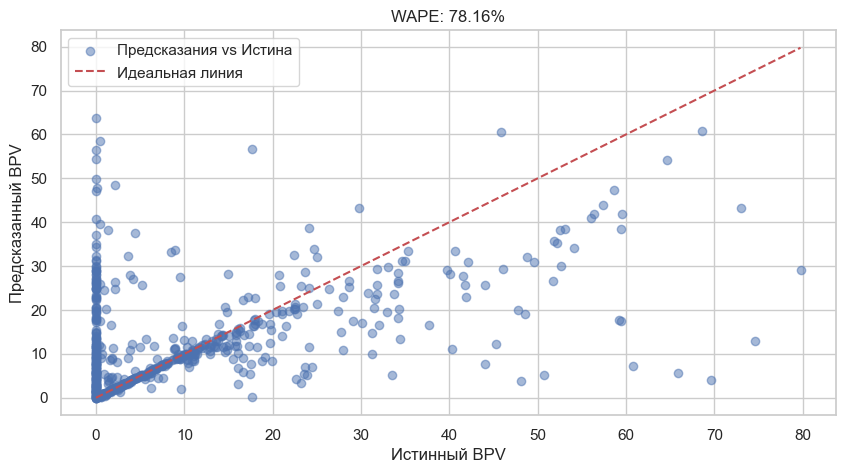

In [114]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, pred, alpha=0.5, label='Предсказания vs Истина')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Идеальная линия')
plt.xlabel('Истинный BPV')
plt.ylabel('Предсказанный BPV')
plt.title(f'WAPE: {wape:.2f}%')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
sales_df_cleaned